# TASKS OF 16/03/2022 CLASS

First, let us import some useful libraries.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
from scipy import interpolate
from scipy.special import erf

# Task 1 - Obtaining the interpolated versions of gaussian and gaussian CDF

## Interpolation with scipy.interpolate

Let us define the "exact" gaussian function and its interpolated version.

In [2]:
### "Exact" gaussian function definition.
def gaussian(mu, sigma, x):
    g = (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2/(2*sigma**2)) 
    return g

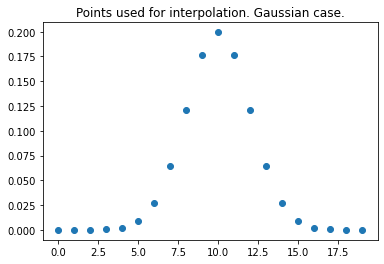

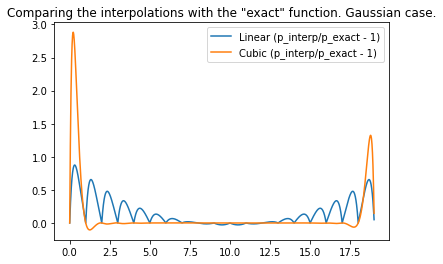

In [3]:
### Coordinates of points for interpolation.
mu = 10    #Mean.
sigma = 2  #Standard deviation.
x_points = np.arange(0, 20, 1)
y_points = gaussian(mu, sigma, x_points)

plt.scatter(x_points, y_points)
plt.title('Points used for interpolation. Gaussian case.')
plt.show()

### New x values to be calculated.
step = 0.01
x_input = np.arange(x_points.min(), x_points.max(), step)


### LINEAR INTERPOLATION
### Defining the linear interpolation from scipy.interpolate:
scipy_interp1d_gauss = interpolate.interp1d(x_points, y_points, kind='linear')
### Comparing the linear interpolation with the "exact" function:
interp_exact_comparisson = scipy_interp1d_gauss(x_input)/gaussian(mu, sigma, x_input) - 1


### CUBIC INTERPOLATION
### Defining the cubic interpolation from scipy.interpolate:
scipy_interp1dcubic_gauss = interpolate.interp1d(x_points, y_points, kind='cubic')
### Comparing the cubic interpolation with the "exact" function:
interpcubic_exact_comparisson = scipy_interp1dcubic_gauss(x_input)/gaussian(mu, sigma, x_input) - 1

plt.plot(x_input, interp_exact_comparisson, label="Linear (p_interp/p_exact - 1)")
plt.legend(loc='upper right')
plt.plot(x_input, interpcubic_exact_comparisson, label="Cubic (p_interp/p_exact - 1)")
plt.legend(loc='upper right')
plt.title('Comparing the interpolations with the "exact" function. Gaussian case.')
plt.show()

Now, let us define the "exact" gaussian cumulative distribution function (CDF) and its interpolated version.

In [4]:
### "Exact" gaussian CDF function definition.
def gaussian_cdf(mu, sigma, x):
    cdf = (erf((x-mu)/(np.sqrt(2)*sigma)) + 1)/2 
    return cdf

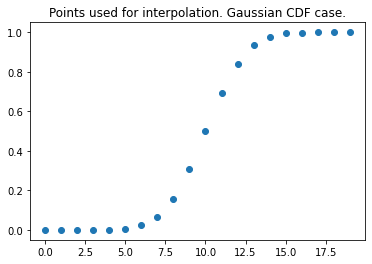

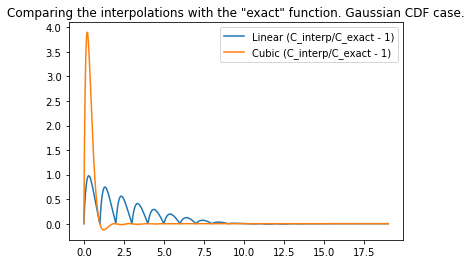

In [5]:
### Coordinates of points for interpolation.
mu = 10    #Mean.
sigma = 2  #Standard deviation.
x_points = np.arange(0, 20, 1)
y_points = gaussian_cdf(mu, sigma, x_points)

plt.scatter(x_points, y_points)
plt.title('Points used for interpolation. Gaussian CDF case.')
plt.show()

### New x values to be calculated.
step = 0.01
x_input = np.arange(x_points.min(), x_points.max(), step)


### LINEAR INTERPOLATION
### Defining the linear interpolation from scipy.interpolate:
scipy_interp1d_gauss_cdf = interpolate.interp1d(x_points, y_points, kind='linear')
### Comparing the linear interpolation with the "exact" function:
interp_exact_comparisson_cdf = scipy_interp1d_gauss_cdf(x_input)/gaussian_cdf(mu, sigma, x_input) - 1


### CUBIC INTERPOLATION
### Defining the cubic interpolation from scipy.interpolate:
scipy_interp1dcubic_gauss_cdf = interpolate.interp1d(x_points, y_points, kind='cubic')
### Comparing the cubic interpolation with the "exact" function:
interpcubic_exact_comparisson_cdf = scipy_interp1dcubic_gauss_cdf(x_input)/gaussian_cdf(mu, sigma, x_input) - 1

plt.plot(x_input, interp_exact_comparisson_cdf, label="Linear (C_interp/C_exact - 1)")
plt.legend(loc='upper right')
plt.plot(x_input, interpcubic_exact_comparisson_cdf, label="Cubic (C_interp/C_exact - 1)")
plt.legend(loc='upper right')
plt.title('Comparing the interpolations with the "exact" function. Gaussian CDF case.')
plt.show()

## Linear interpolation with my own function

First, let us define the interpolation function.

In [6]:
### Linear interpolation function.
def linearinterp1d(x_points, y_points, x_input):
    y_output = np.zeros(len(x_input))
    i=0
    j=0
    
    for j in range(0, len(x_input)):
        number = x_input[j]
        for i in range(0, len(x_points)):
            if (x_points[i]<=number<x_points[i+1]):
                y_output[j] = y_points[i] + (y_points[i+1]-y_points[i])*(number-x_points[i])/(x_points[i+1]-x_points[i])
            i+=1
        j+=1
    
    return y_output

Now, let us calculate it for the gaussian case.

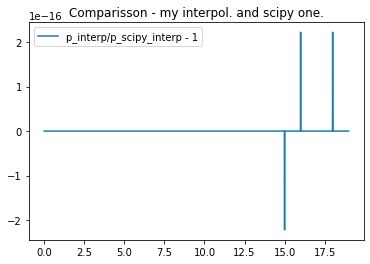

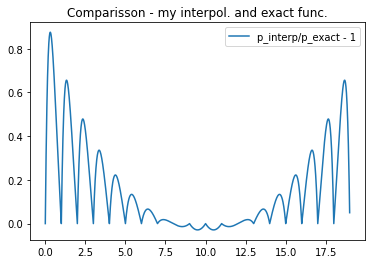

In [7]:
### Coordinates of points for interpolation.
mu = 10    #Mean.
sigma = 2  #Standard deviation.
x_points = np.arange(0, 20, 1)
y_points = gaussian(mu, sigma, x_points)

#New x values to be calculated.
step = 0.01
x_input = np.arange(x_points.min(), x_points.max(), step)

#Using my own interpolation function.
interp_own_gauss = linearinterp1d(x_points, y_points, x_input)

#Using the scipy.interpolate function.
scipy_interp1d_gauss = interpolate.interp1d(x_points, y_points, kind='linear')
interp_scipy_gauss = scipy_interp1d_gauss(x_input)

#Comparing my own interpolation function with scipy one.
owninterp_interp_comparisson = interp_own_gauss/interp_scipy_gauss - 1
plt.plot(x_input, owninterp_interp_comparisson, label='p_interp/p_scipy_interp - 1')
plt.legend(loc='upper left')
plt.title('Comparisson - my interpol. and scipy one.')
plt.show()

#Comparing my own interpolation function with the exact one.
owninterp_exact_comparisson = interp_own_gauss/gaussian(mu, sigma, x_input) - 1
plt.plot(x_input, owninterp_exact_comparisson, label='p_interp/p_exact - 1')
plt.legend(loc='upper right')
plt.title('Comparisson - my interpol. and exact func.')
plt.show()

# Task 2 - Generating some data from a distribution

First of all, let us calculate the inverse CDF.

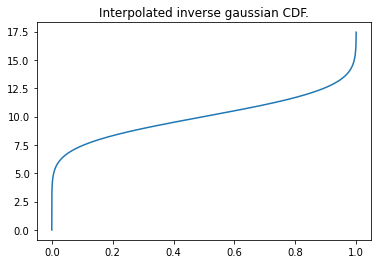

In [8]:
### Coordinates of points for interpolation.
mu = 10    #Mean.
sigma = 2  #Standard deviation.
y_points = np.arange(0, 21, 0.0001)
x_points = gaussian_cdf(mu, sigma, y_points)

#New x values to be calculated.
step = 0.0001
x_input = np.arange(x_points.min(), x_points.max(), step)

### Defining the cubic interpolation from scipy.interpolate:
scipy_interp1dcubic_inverse_gauss_cdf = interpolate.interp1d(x_points, y_points, kind='cubic')

plt.plot(x_input, scipy_interp1dcubic_inverse_gauss_cdf(x_input))
plt.title('Interpolated inverse gaussian CDF.')
plt.show()

Now, let us generate some uniformly distributed random numbers.

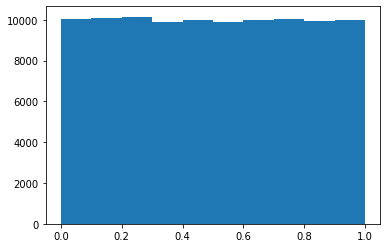

In [9]:
rnd_numbers_quantity = 100000
rnd = np.random.random_sample(size=rnd_numbers_quantity)
plt.hist(rnd)
plt.show()

Then, let us calculate X_i = X(C), that is, a gaussian distributed random sample. For this, we just put the random numbers generated above in the inverse gaussian CDF.

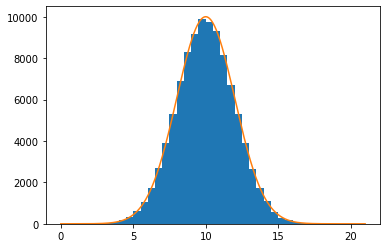

In [10]:
#Gaussian distributed random sample.
x_i = scipy_interp1dcubic_inverse_gauss_cdf(rnd)

#Some input for plotting the exact gaussian, and some rescaling factor.
x_input = np.arange(0,21,0.001)
resc_factor = (1/10)*rnd_numbers_quantity/gaussian(mu, sigma, mu)

plt.hist(x_i, bins=np.arange(0,21,0.5))
plt.plot(x_input, gaussian(mu, sigma, x_input)*resc_factor)
plt.show()